In [5]:
from multiplicative_weights_sim import generate_agents, start_multiprocess_sim, Agent, Tolerance, sim
from generate_opinions import *
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
import random
from pickle_utils import save_agents

In [2]:
num_agents = 1000

saved_opinions = pd.read_csv('constants/opinions.csv', index_col=0)
opinions = saved_opinions['0'].to_list()

# Creating agents with different distributions of opinions
all_agents = []
for percent_low in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
    num_extra_low = int(num_agents*percent_low)
    num_same = int(num_agents*(1-percent_low)/2)
    num_high = num_agents - num_extra_low - num_same

    weights = []

    for i in range(0, num_extra_low):
        weights.append(np.array([8, 1, 1]))

    for i in range(0, num_same):
        weights.append(np.array([1, 1, 1]))

    for i in range(0, num_high):
        weights.append(np.array([1, 1, 8]))

    random.shuffle(weights)
    agents = generate_agents(opinions, weights)
    all_agents.append((percent_low, agents))

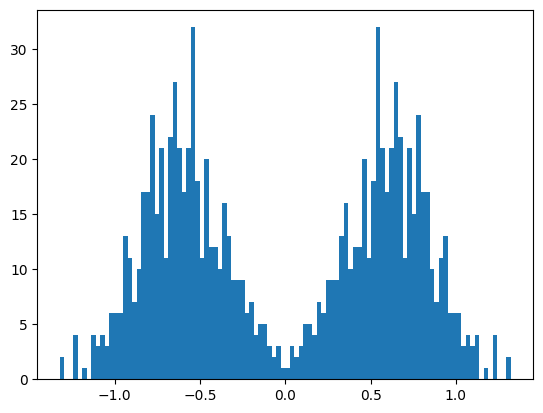

In [3]:
plt.hist(opinions, bins=100)
plt.show()

In [4]:
all_agents_post_sim = start_multiprocess_sim(all_agents)

Simulating low preference percent 0.9
Simulating low preference percent 0.8
Simulating low preference percent 0.7
Simulating low preference percent 0.6
Simulating low preference percent 0.5
Simulating low preference percent 0.4
Simulating low preference percent 0.3
Simulating low preference percent 0.2
Simulating low preference percent 0.1
iterations: 0 - 100 took 33.852113008499146 seconds
iterations: 0 - 100 took 33.907886028289795 seconds
iterations: 0 - 100 took 34.31880283355713 seconds
iterations: 0 - 100 took 34.442790031433105 seconds
iterations: 0 - 100 took 34.39024472236633 seconds
iterations: 0 - 100 took 34.40729308128357 seconds
iterations: 0 - 100 took 34.493732929229736 seconds
iterations: 0 - 100 took 34.53845977783203 seconds
iterations: 0 - 100 took 34.793272972106934 seconds
iterations: 100 - 200 took 46.510807037353516 seconds
iterations: 100 - 200 took 46.60925579071045 seconds
iterations: 100 - 200 took 46.887500047683716 seconds
iterations: 100 - 200 took 46.820

In [16]:
# all_agents_post_sim = []
# for percent_low, agents in all_agents:
#     print(f"simulating low preference percent {percent_low}")
#     num_iterations = 1000
#     learning_rate = 0.1
#     all_agents_post_sim.append((percent_low, sim(agents, num_iterations, learning_rate)))

simulating low preference percent 0.9
iterations: 0 - 100 took 17.179112911224365 seconds
iterations: 100 - 200 took 16.43026614189148 seconds
iterations: 200 - 300 took 17.688273191452026 seconds
iterations: 300 - 400 took 17.47751021385193 seconds
iterations: 400 - 500 took 16.01121425628662 seconds
iterations: 500 - 600 took 18.65367102622986 seconds
iterations: 600 - 700 took 18.825345039367676 seconds
iterations: 700 - 800 took 19.16001296043396 seconds
iterations: 800 - 900 took 17.32984495162964 seconds
total sim time: 177.0339639186859
simulating low preference percent 0.8
iterations: 0 - 100 took 17.358619213104248 seconds
iterations: 100 - 200 took 17.482038021087646 seconds
iterations: 200 - 300 took 17.02517795562744 seconds
iterations: 300 - 400 took 16.440105199813843 seconds
iterations: 400 - 500 took 16.664769172668457 seconds
iterations: 500 - 600 took 16.972515106201172 seconds
iterations: 600 - 700 took 17.611331701278687 seconds
iterations: 700 - 800 took 17.7171199

In [19]:
import pickle
def save_agents(agents, filename):
    filename = "../saved_sim_runs/" + filename + ".pkl"
    with open(filename, "wb") as file:
        pickle.dump(agents, file)

In [20]:
for percent_low, agents in all_agents_post_sim:
    save_agents(agents, f"agents_multiprocess_sim_{percent_low}")

In [ ]:
all_agents_post_sim = start_multiprocess_sim(all_agents)